In [4]:
!pip install -q tensorflow_datasets

import tensorflow_datasets as tfds
import tensorflow as tf

dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

train_data = dataset['train']
test_data = dataset['test']
val_data = dataset['validation']

print("Download Selesai!")
print(f"Jumlah Label/Kelas: {info.features['label'].num_classes}")
print(f"Nama-nama Bunga: {info.features['label'].names}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.2NHU16_2.1.1/oxford_flowers102-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.2NHU16_2.1.1/oxford_flowers102-test.tfrecord*…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.2NHU16_2.1.1/oxford_flowers102-validation.tfr…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.
Download Selesai!
Jumlah Label/Kelas: 102
Nama-nama Bunga: ['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigol

In [5]:
IMG_SIZE = 224
BATCH_SIZE = 32

def format_image(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255.0
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

train_batches = train_data.map(format_image).shuffle(1000).batch(BATCH_SIZE).prefetch(1)
validation_batches = val_data.map(format_image).batch(BATCH_SIZE).prefetch(1)
test_batches = test_data.map(format_image).batch(BATCH_SIZE).prefetch(1)

print("Preprocessing Selesai! Data siap masuk ke model CNN.")

Preprocessing Selesai! Data siap masuk ke model CNN.


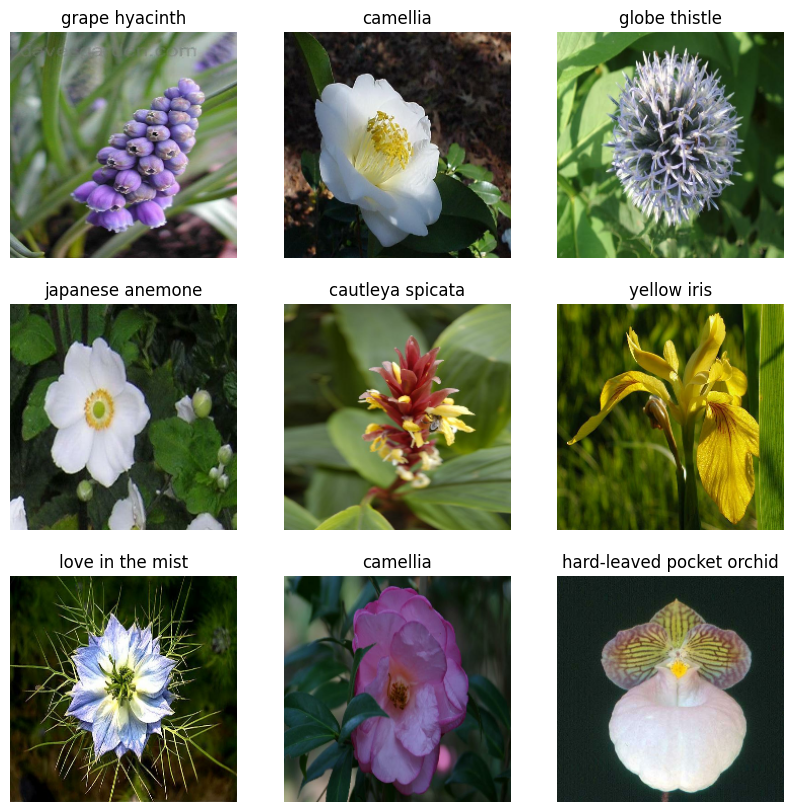

In [6]:
import matplotlib.pyplot as plt
import numpy as np

image_batch, label_batch = next(iter(train_batches))

class_names = info.features['label'].names

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i])
    label_index = label_batch[i]
    plt.title(class_names[label_index])
    plt.axis("off")

plt.show()

In [7]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(102, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 102)            │       130,662 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,388,646 (9.11 MB)

 Trainable params: 130,662 (510.40 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
history = model.fit(train_batches,
                    epochs=10,
                    validation_data=validation_batches)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 846ms/step - accuracy: 0.0332 - loss: 4.8689 - val_accuracy: 0.3304 - val_loss: 3.2163
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.4887 - loss: 2.5968 - val_accuracy: 0.6157 - val_loss: 2.1338
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step - accuracy: 0.7934 - loss: 1.4715 - val_accuracy: 0.7039 - val_loss: 1.6441
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9221 - loss: 0.9143 - val_accuracy: 0.7412 - val_loss: 1.3764
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.9396 - loss: 0.6145 - val_accuracy: 0.7539 - val_loss: 1.2313
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9739 - loss: 0.4370 - val_accuracy: 0.7716 - val_loss: 1.1273
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9877 - loss: 0.3328 - val_accuracy: 0.7765 - val_loss: 1.0589
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9957 - loss: 0.2702 - val_accuracy: 0.785

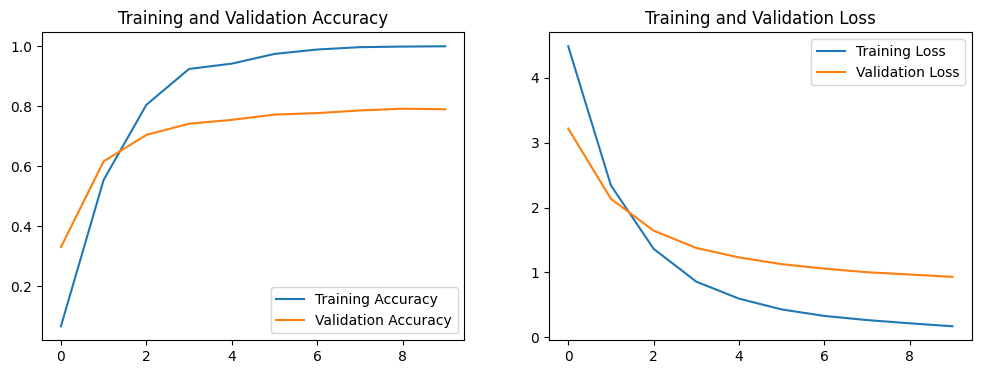

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

Mulai Evaluasi Hemat RAM...

--- LAPORAN KLASIFIKASI ---
                           precision    recall  f1-score   support

            pink primrose       0.29      0.70      0.41        20
hard-leaved pocket orchid       1.00      0.90      0.95        40
         canterbury bells       0.15      0.40      0.21        20
                sweet pea       0.24      0.33      0.28        36
         english marigold       0.75      0.60      0.67        45
               tiger lily       0.79      0.88      0.83        25
              moon orchid       0.53      0.85      0.65        20
         bird of paradise       0.90      0.98      0.94        65
                monkshood       0.75      0.81      0.78        26
            globe thistle       0.74      0.92      0.82        25
               snapdragon       0.49      0.55      0.52        67
              colt's foot       0.92      0.82      0.87        67
              king protea       0.76      0.90      0.83        29
    

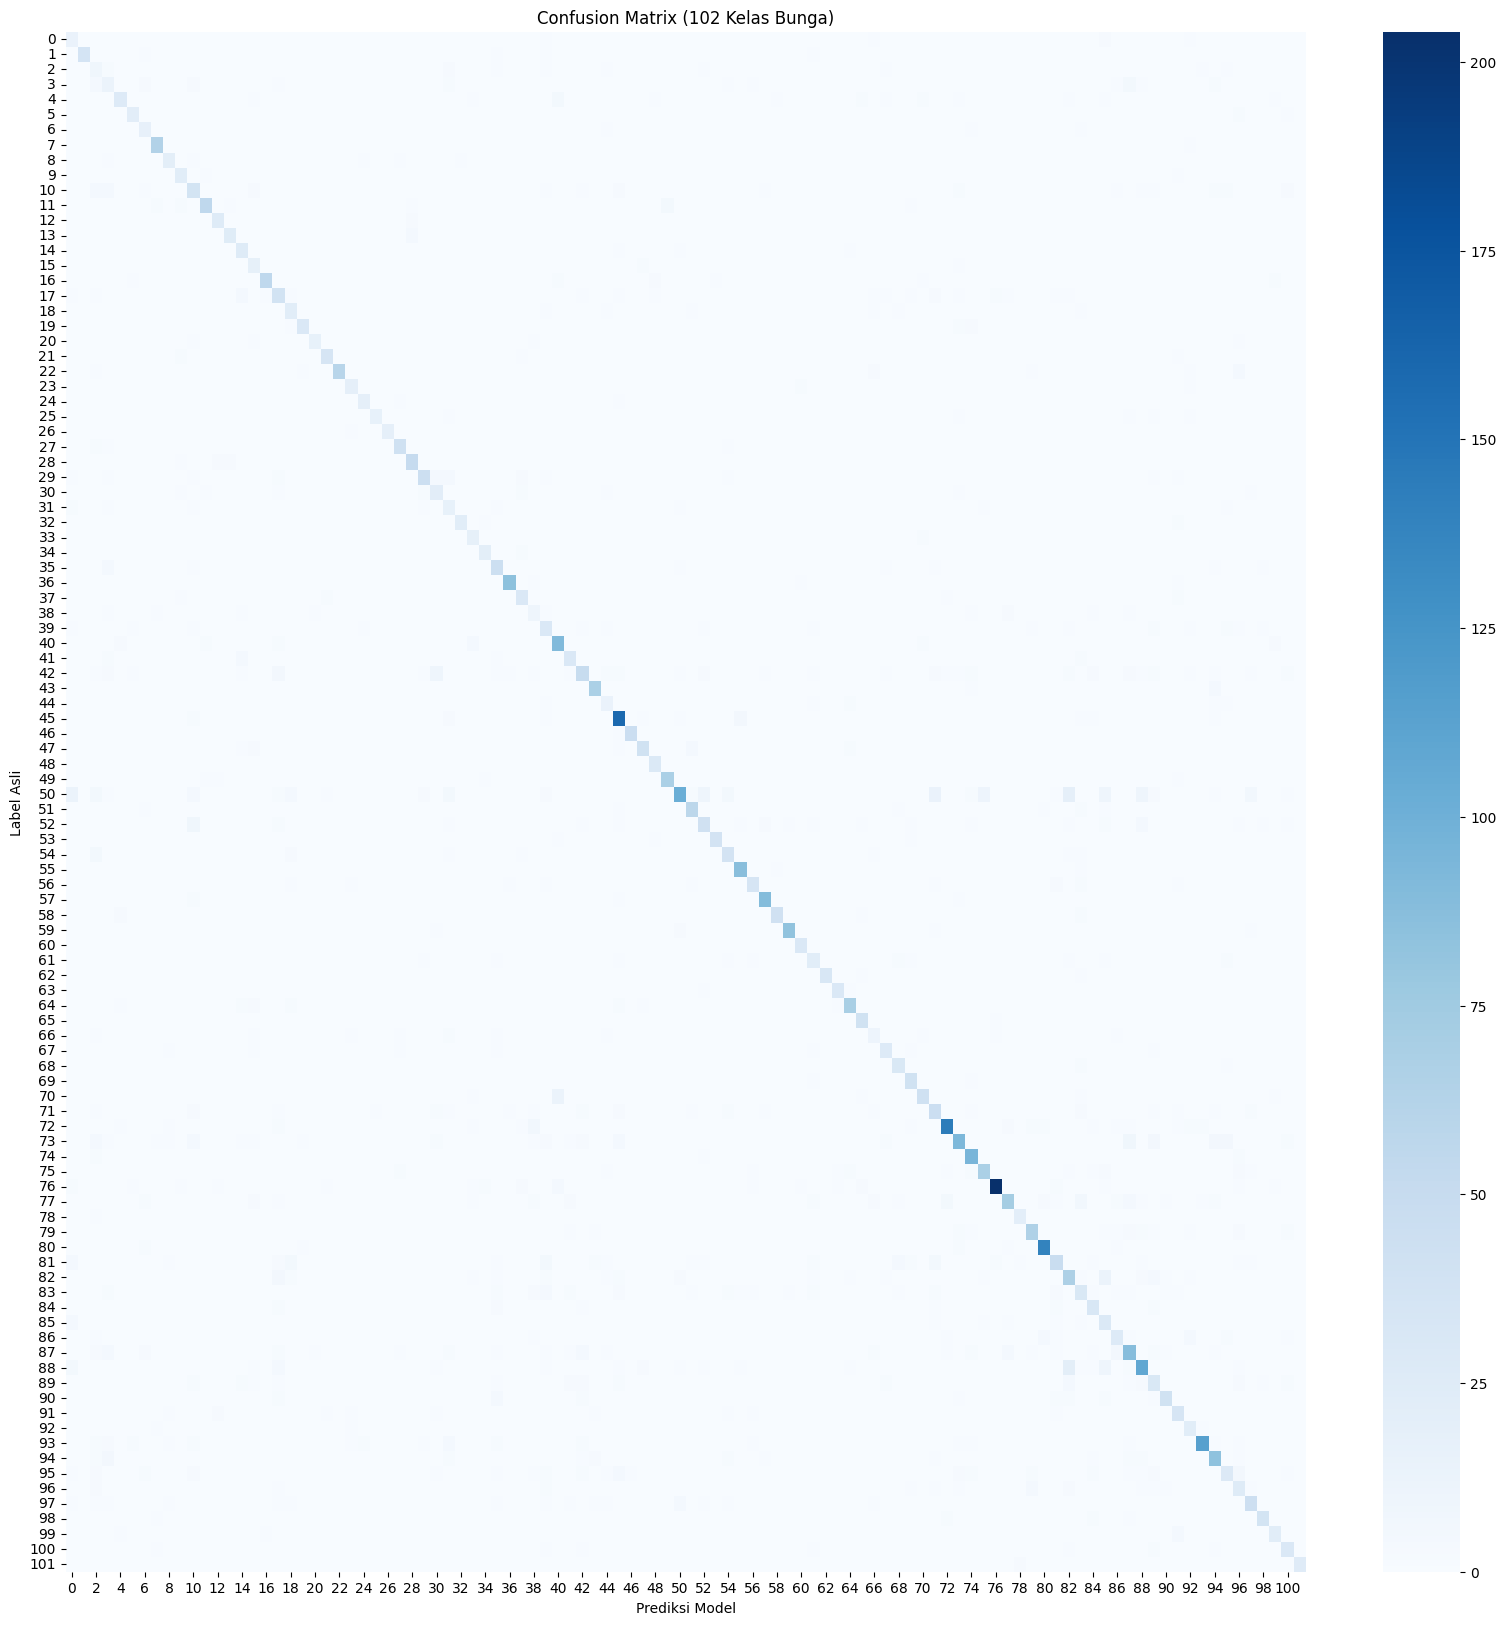

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

test_batch_size = 32
test_dataset_batched = test_data.map(format_image).batch(test_batch_size)

print("Mulai Evaluasi Hemat RAM...")

y_true = []
y_pred = []

for images, labels in test_dataset_batched:
    preds = model.predict(images, verbose=0)
    pred_classes = np.argmax(preds, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(pred_classes)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# --- CLASSIFICATION REPORT ---
print("\n--- LAPORAN KLASIFIKASI ---")
print(classification_report(y_true, y_pred, target_names=info.features['label'].names))

# --- CONFUSION MATRIX ---
print("\n--- CONFUSION MATRIX ---")
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title('Confusion Matrix (102 Kelas Bunga)')
plt.ylabel('Label Asli')
plt.xlabel('Prediksi Model')
plt.show()

Silakan upload gambar bunga dari komputermu...


Saving Sunflowers-bring-the-light-and-color.jpg to Sunflowers-bring-the-light-and-color.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


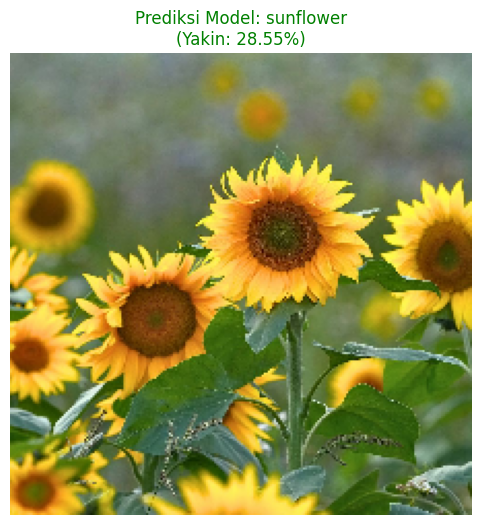

In [14]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

# 1. Upload Gambar
print("Silakan upload gambar bunga dari komputermu...")
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn

  img = load_img(path, target_size=(224, 224))

  # Ubah jadi array angka
  x = img_to_array(img)
  # Tambahkan dimensi batch (karena model butuh input 4 dimensi: batch, lebar, tinggi, warna)
  x = np.expand_dims(x, axis=0)
  # Normalisasi (0-1)
  x = x / 255.0

  # 3. Prediksi
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  # Ambil index dengan nilai tertinggi
  predicted_index = np.argmax(classes)
  confidence = np.max(classes) * 100 # Tingkat keyakinan model (%)

  # Ambil nama bunga dari info dataset
  predicted_flower = info.features['label'].names[predicted_index]

  # 4. Tampilkan Hasil
  plt.figure(figsize=(6,6))
  plt.imshow(img) # Tampilkan gambar asli
  plt.axis('off')
  # Judul berisi Nama Tebakan & Tingkat Keyakinan
  plt.title(f"Prediksi Model: {predicted_flower}\n(Yakin: {confidence:.2f}%)", color='green')
  plt.show()

In [12]:
model.save('model_bunga_oxford.h5')

In [13]:
model.save('my_model.keras')